In [1]:
# Импорты и загрузка данных
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

if '../src' not in sys.path:
    sys.path.append('../src')
from database import load_corrosion_data_new as load_data
from analysis import AdvancedCorrosionAnalyzer


In [2]:
# Настройки
sns.set(style='whitegrid')
TARGET = 'worst_corrosion_rate_mm_per_year'

# Загрузка
DF_loaded = load_data()
assert TARGET in DF_loaded.columns, 'В данных отсутствует corrosion_rate_mm_per_year'

print(f"Данные: {len(DF_loaded):,} строк, {len(DF_loaded.columns)} колонок")
print('Колонки:')
print(sorted(DF_loaded.columns.tolist()))

Данные: 143,060 строк, 45 колонок
Колонки:
['ammonia_content', 'avg_corrosion_rate_mm_per_year', 'chloride_aggressiveness', 'chlorine_content', 'co2_content', 'component_type_id', 'component_type_name', 'contour', 'corrosion_aggressiveness_index', 'corrosion_inhibitor_content', 'corrosion_protection_index', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'equipment', 'equipment_age_years', 'h2s_aggressiveness_index', 'h2s_content', 'h2s_water_ratio', 'hydrochloric_acid_content', 'inner_diameter', 'installation', 'material_code', 'material_resistance_score', 'material_type', 'measurement_date', 'measurement_points_in_section', 'min_corrosion_rate_mm_per_year', 'nominal_thickness_mmc', 'operating_pressure', 'operating_temperature', 'outer_diameter', 'oxygen_content', 'pitting_corrosion_index', 'section_number', 'stress_corrosion_index', 'tmin_mmc', 'total_acidity_index', 'total_acids', 'total_chlorine_compounds', 'total_sulfur_compounds', 'underdeposit_corrosion_index', 'wall_thic

In [3]:
# Фильтрация по конкретной установке
INSTALLATION_FILTER = 'КК'
DF = DF_loaded[DF_loaded['installation'] == INSTALLATION_FILTER]

print(f"После фильтрации по '{INSTALLATION_FILTER}': {len(DF):,} строк")


После фильтрации по 'КК': 52,010 строк


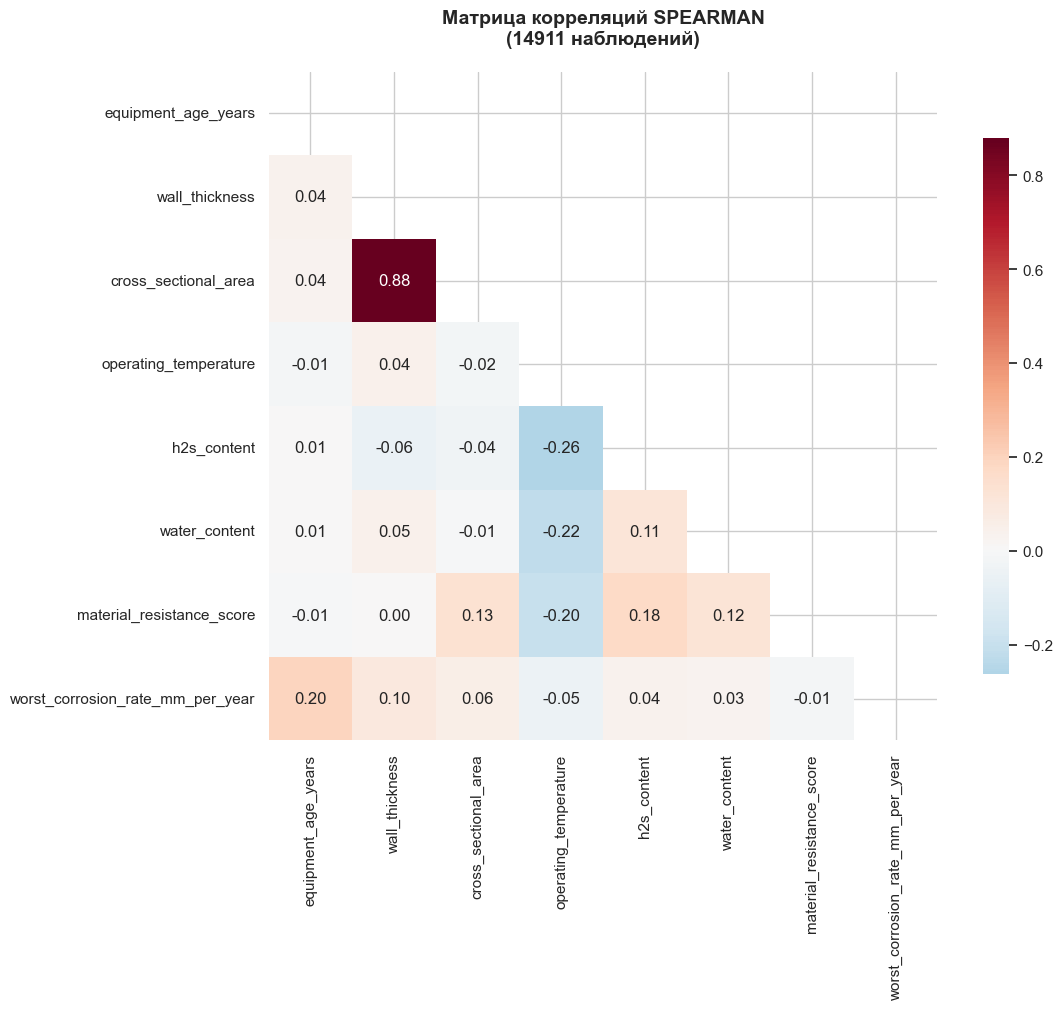

ТОП-7 ПРИЗНАКОВ ПО КОРРЕЛЯЦИИ SPEARMAN

📈 СТАТИСТИЧЕСКИ ЗНАЧИМЫЕ (p < 0.05):
  equipment_age_years            | r =   0.200 *** 🡅
  wall_thickness                 | r =   0.099 *** 🡅
  cross_sectional_area           | r =   0.059 *** 🡅
  operating_temperature          | r =  -0.051 *** 🡇
  h2s_content                    | r =   0.040 *** 🡅
  water_content                  | r =   0.032 *** 🡅

📊 Статистика:
   Всего значимых корреляций: 6
   Максимальная корреляция: 0.200
   Минимальная корреляция: 0.013


In [4]:
# 1. Инициализация с любыми данными
analyzer = AdvancedCorrosionAnalyzer(DF)

# 2. Установка целевой переменной
analyzer.set_target('worst_corrosion_rate_mm_per_year')

# 3. Анализ корреляций для конкретных колонок
features_to_analyze = ['h2s_content', 'water_content', 'operating_temperature', 
                      'material_resistance_score', 'wall_thickness', 'equipment_age_years','cross_sectional_area']

correlations = analyzer.analyze_correlations(
    feature_columns=features_to_analyze,
    method='spearman',
    top_k=15,
    plot_matrix=True
)


🔬 Тестируем набор: 1
   Признаки: ['operating_temperature', 'operating_pressure', 'material_resistance_score']


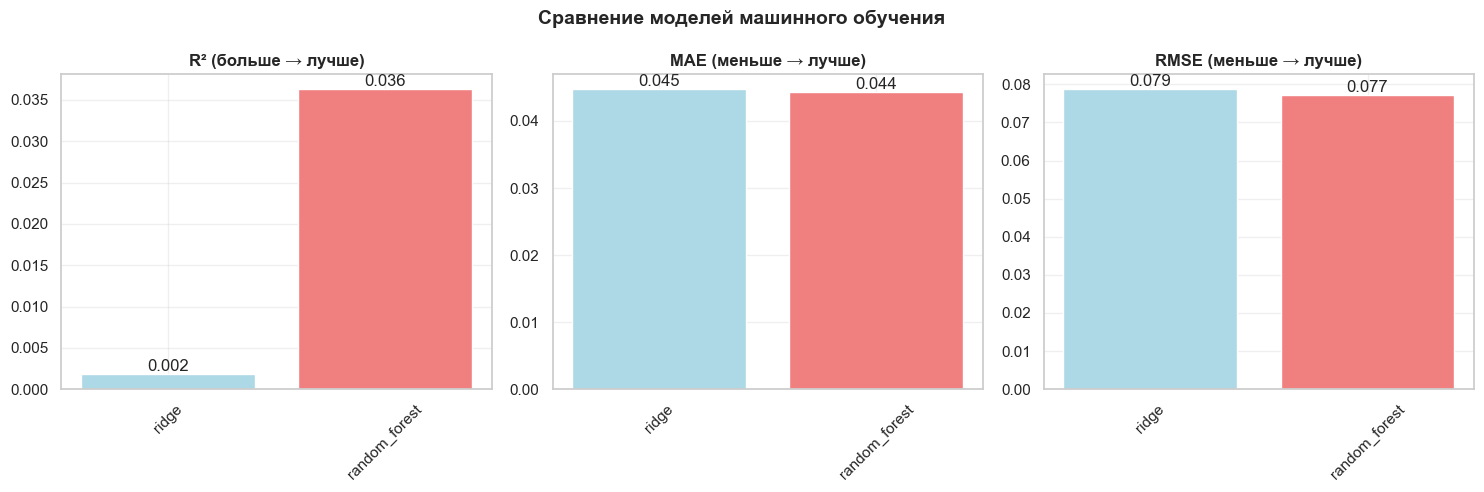

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0018 | MAE =  0.0447 | RMSE =  0.0787
   random_forest   | R² =  0.0363 | MAE =  0.0444 | RMSE =  0.0773

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0363)

🔬 Тестируем набор: 2
   Признаки: ['cross_sectional_area', 'component_type_id', 'nominal_thickness_mmc', 'h2s_content', 'operating_temperature', 'operating_pressure', 'water_content']


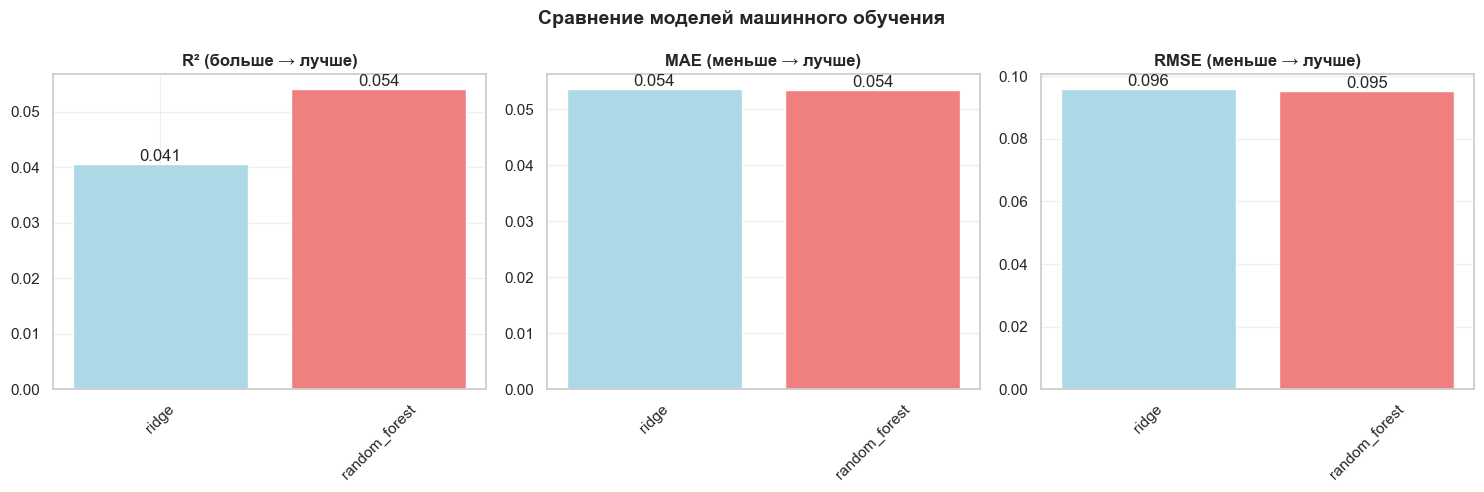

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0405 | MAE =  0.0536 | RMSE =  0.0958
   random_forest   | R² =  0.0540 | MAE =  0.0535 | RMSE =  0.0952

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0540)

🔬 Тестируем набор: 3
   Признаки: ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years']


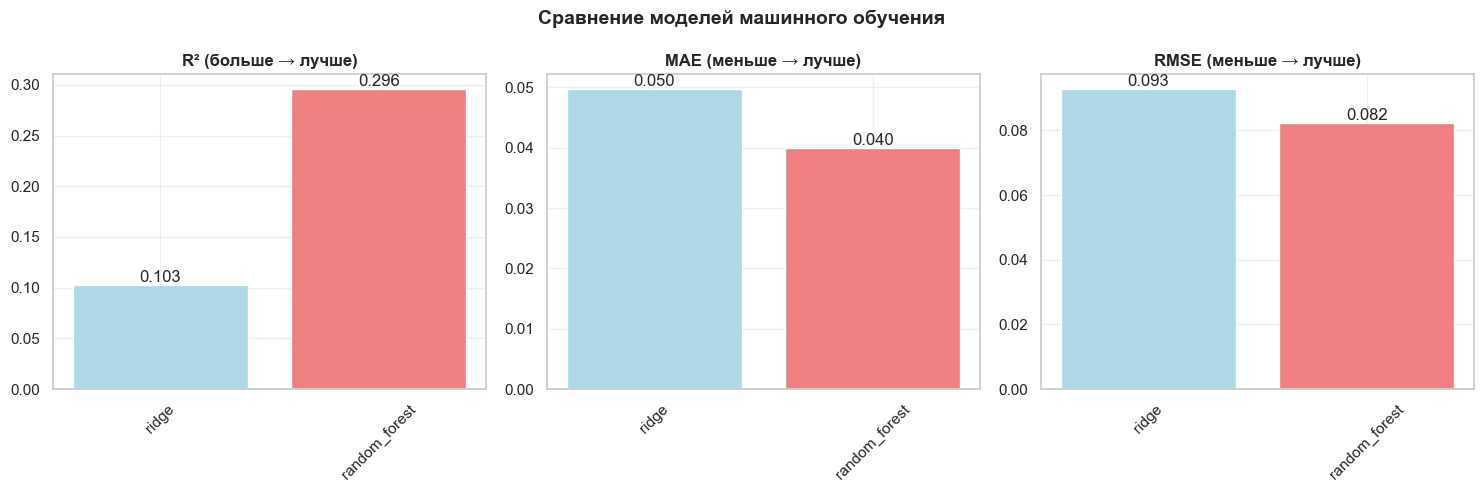

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1027 | MAE =  0.0497 | RMSE =  0.0927
   random_forest   | R² =  0.2955 | MAE =  0.0400 | RMSE =  0.0821

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2955)

🔬 Тестируем набор: 4
   Признаки: ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


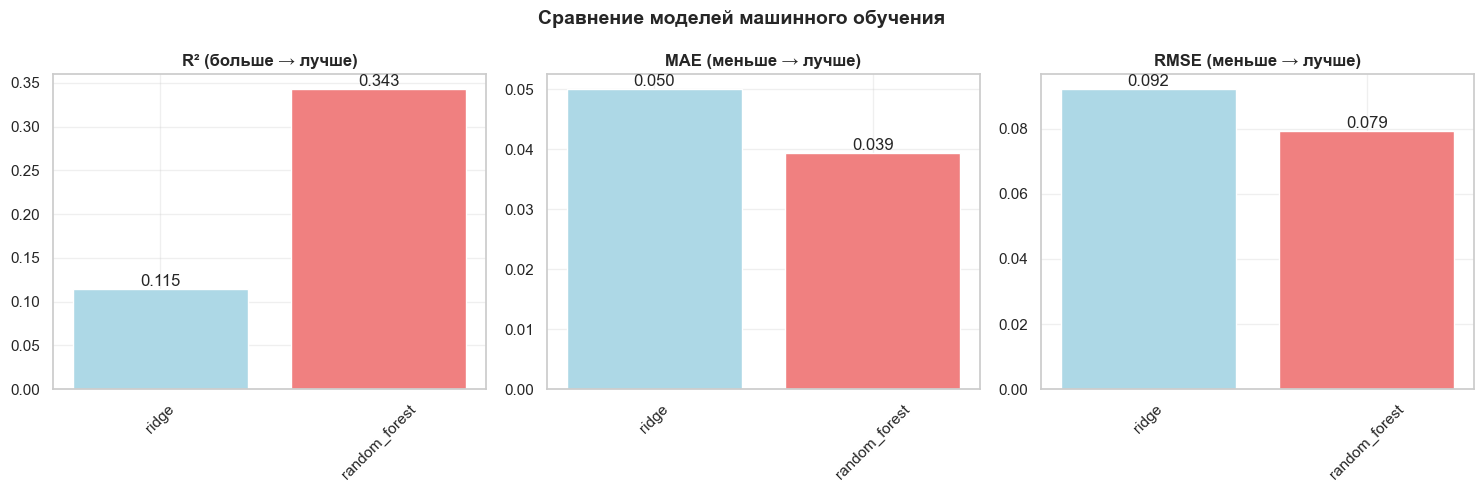

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1149 | MAE =  0.0500 | RMSE =  0.0920
   random_forest   | R² =  0.3426 | MAE =  0.0393 | RMSE =  0.0793

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.3426)

🔬 Тестируем набор: 5
   Признаки: ['h2s_aggressiveness_index', 'h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


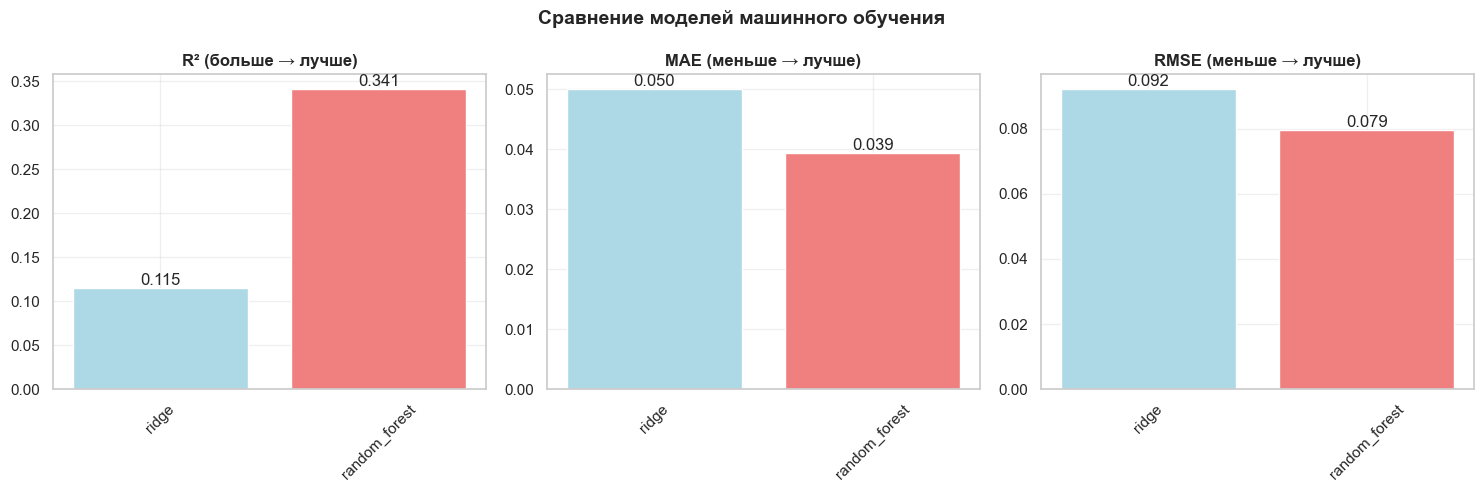

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1149 | MAE =  0.0500 | RMSE =  0.0920
   random_forest   | R² =  0.3410 | MAE =  0.0393 | RMSE =  0.0794

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.3410)

🔬 Тестируем набор: 6
   Признаки: ['h2s_content', 'h2s_water_ratio', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


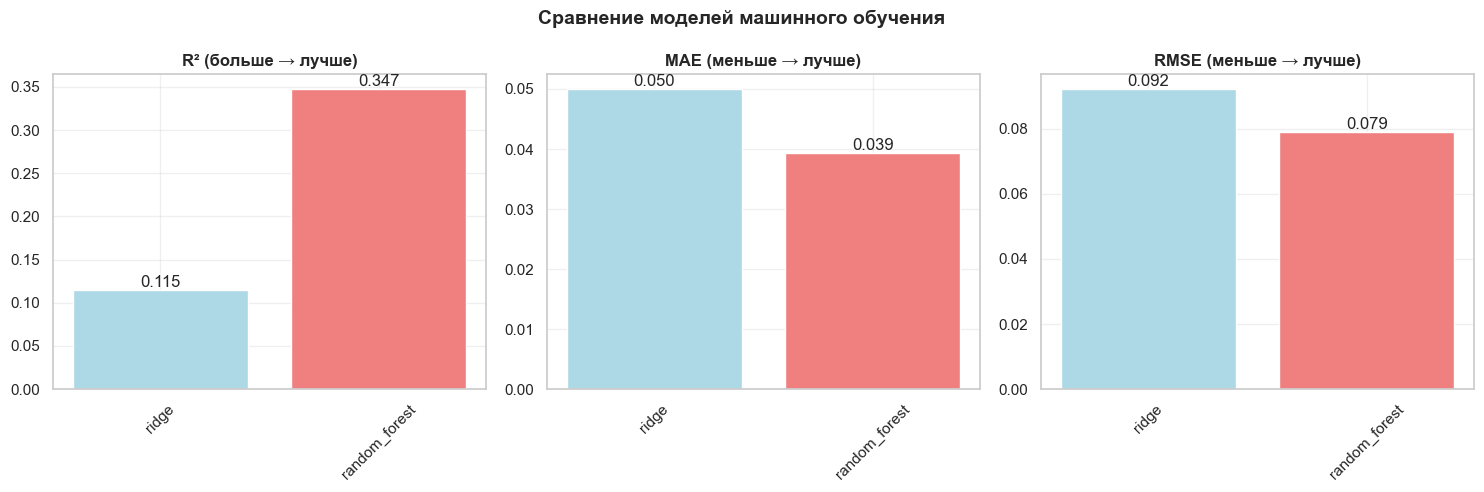

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1150 | MAE =  0.0499 | RMSE =  0.0920
   random_forest   | R² =  0.3472 | MAE =  0.0393 | RMSE =  0.0790

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.3472)

🔬 Тестируем набор: 7
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id']


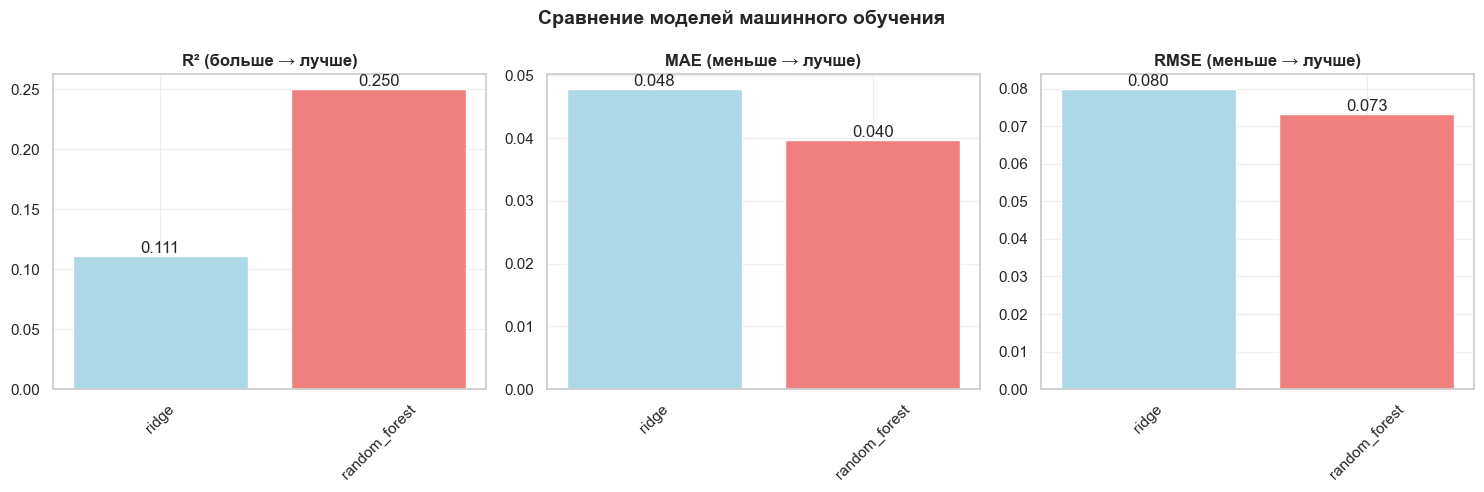

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1111 | MAE =  0.0478 | RMSE =  0.0798
   random_forest   | R² =  0.2500 | MAE =  0.0396 | RMSE =  0.0733

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2500)

🔬 Тестируем набор: 8
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'chloride_aggressiveness']


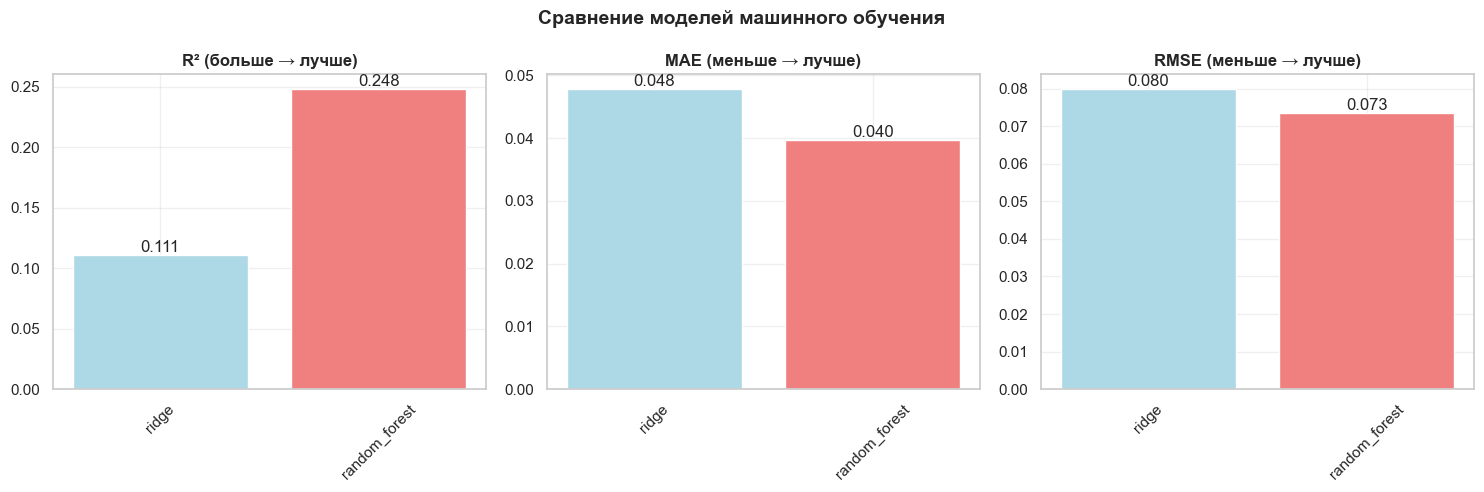

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1111 | MAE =  0.0478 | RMSE =  0.0798
   random_forest   | R² =  0.2479 | MAE =  0.0396 | RMSE =  0.0734

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2479)

🔬 Тестируем набор: 9
   Признаки: ['h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'underdeposit_corrosion_index']


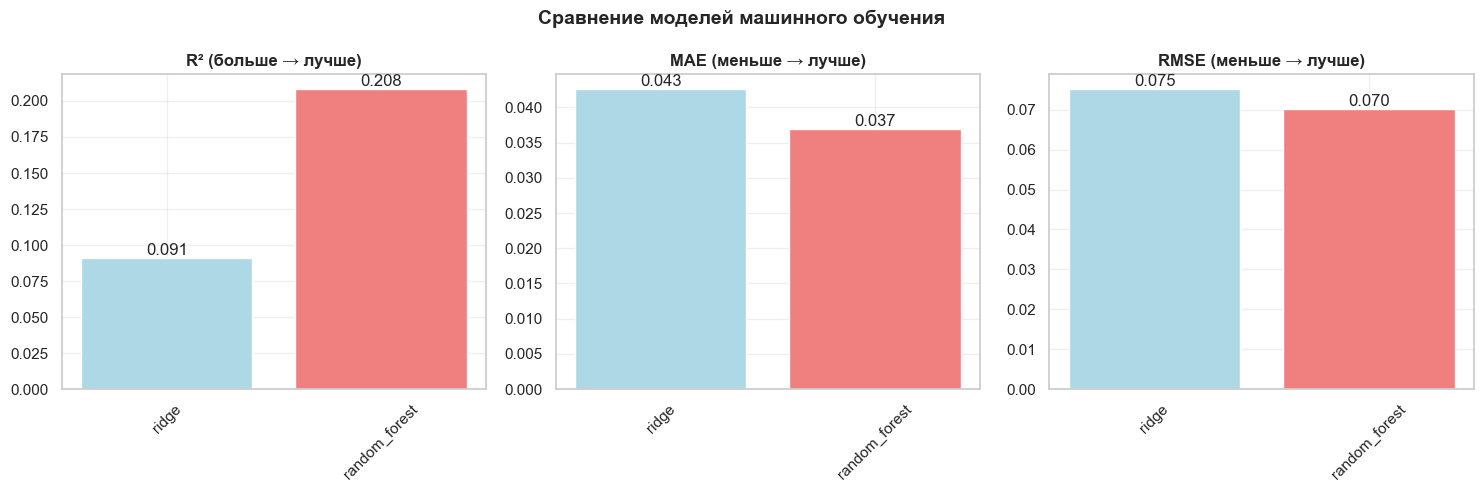

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0912 | MAE =  0.0426 | RMSE =  0.0751
   random_forest   | R² =  0.2081 | MAE =  0.0370 | RMSE =  0.0701

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2081)

🔬 Тестируем набор: 10
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index', 'cross_sectional_area']


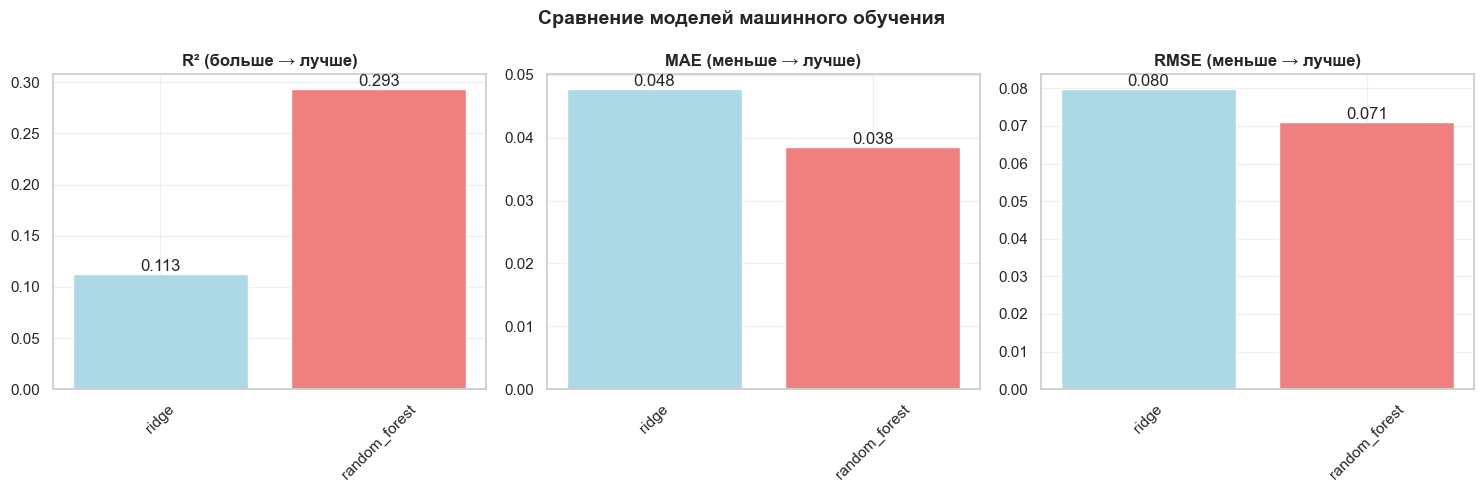

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1127 | MAE =  0.0477 | RMSE =  0.0797
   random_forest   | R² =  0.2931 | MAE =  0.0385 | RMSE =  0.0712

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2931)

📋 Сводная таблица по наборам признаков (Random Forest):
                  R2 Random Forest  MAE Random Forest
Набор параметров                                     
1                           0.0363             0.0444
2                           0.0540             0.0535
3                           0.2955             0.0400
4                           0.3426             0.0393
5                           0.3410             0.0393
6                           0.3472             0.0393
7                           0.2500             0.0396
8                           0.2479             0.0396
9                           0.2081             0.0370
10                          0.2931             0.0385


<Figure size 1200x600 with 0 Axes>

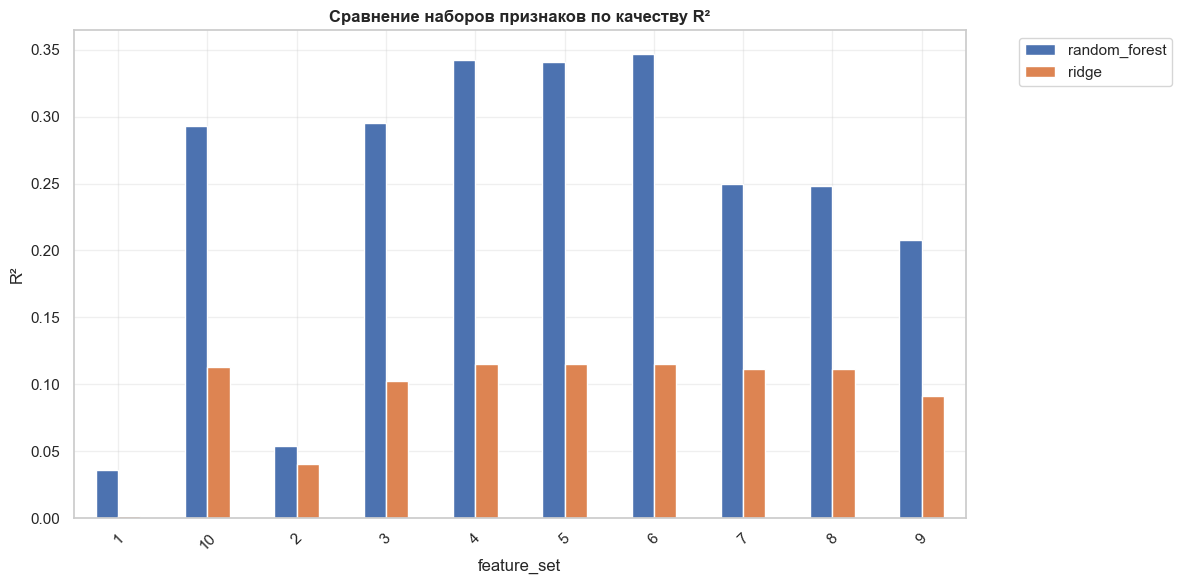

In [5]:
# 5. Сравнение разных наборов признаков
feature_sets = {
    '1': ['operating_temperature', 'operating_pressure', 'material_resistance_score'],
    '2': ['cross_sectional_area','component_type_id','nominal_thickness_mmc','h2s_content','operating_temperature','operating_pressure','water_content'],
    '3': ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years'],
    '4': ['h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '5': ['h2s_aggressiveness_index', 'h2s_content', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '6': ['h2s_content', 'h2s_water_ratio', 'water_content', 'operating_temperature', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '7': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id'],
    '8': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','chloride_aggressiveness'],
    '9': ['h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','underdeposit_corrosion_index'],
    '9': ['h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','underdeposit_corrosion_index'],
    '10': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','corrosion_protection_index','cross_sectional_area'],

}

comparison = analyzer.compare_feature_sets(feature_sets)


🔬 Тестируем набор: 10
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index', 'stress_corrosion_index']


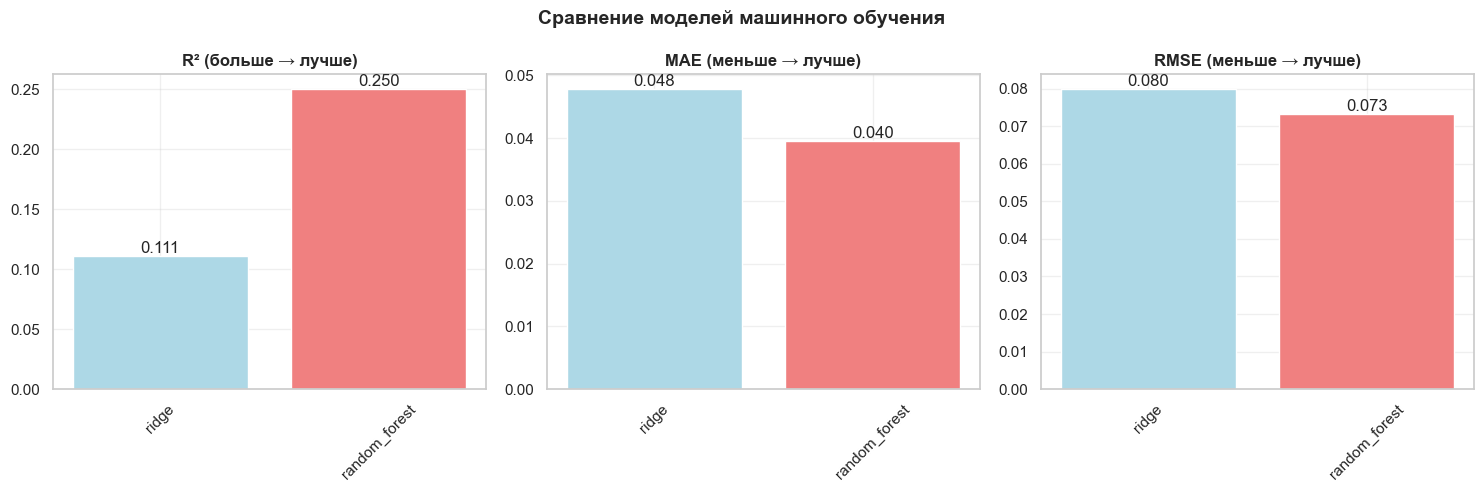

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1111 | MAE =  0.0478 | RMSE =  0.0798
   random_forest   | R² =  0.2500 | MAE =  0.0396 | RMSE =  0.0733

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2500)

🔬 Тестируем набор: 11
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index']


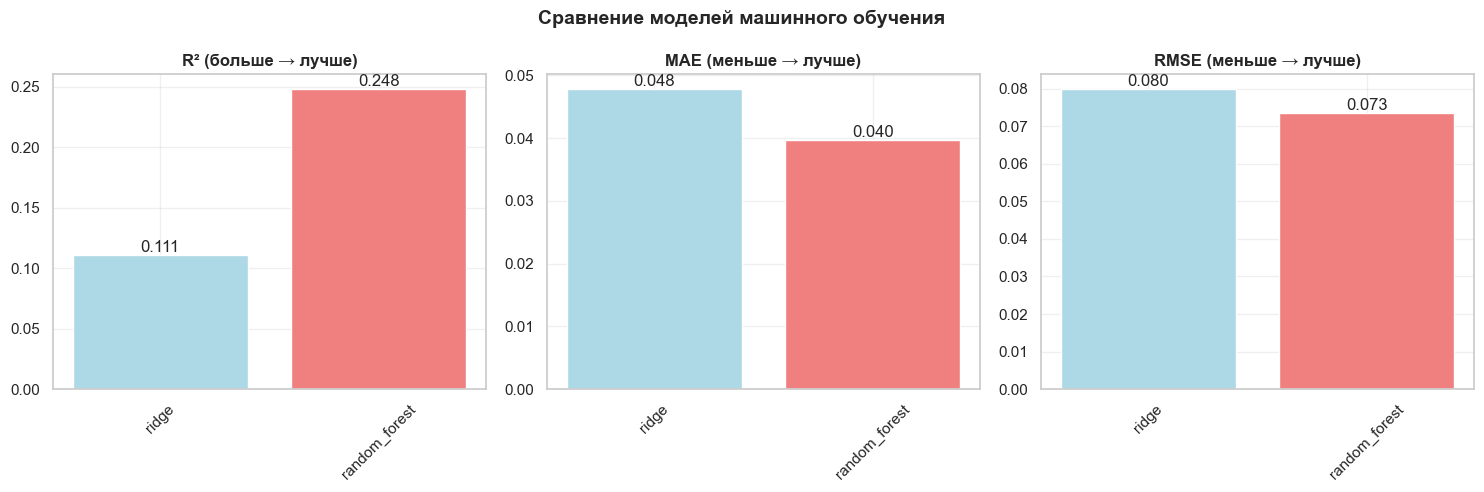

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1111 | MAE =  0.0478 | RMSE =  0.0798
   random_forest   | R² =  0.2479 | MAE =  0.0396 | RMSE =  0.0734

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2479)

📋 Сводная таблица по наборам признаков (Random Forest):
                  R2 Random Forest  MAE Random Forest
Набор параметров                                     
10                          0.2500             0.0396
11                          0.2479             0.0396


<Figure size 1200x600 with 0 Axes>

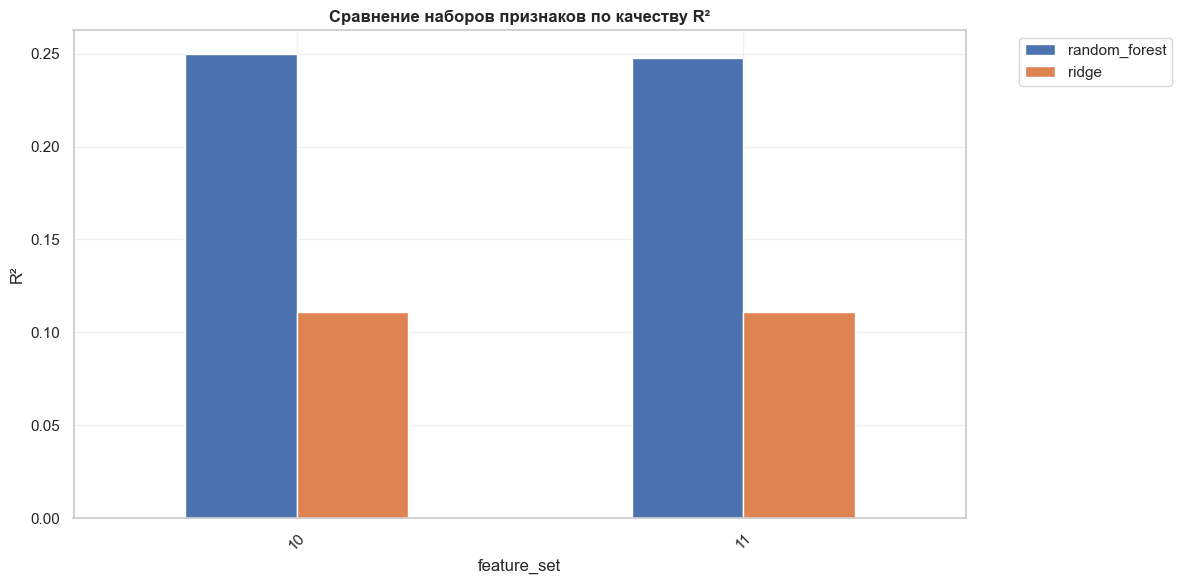

In [6]:
# 5. Сравнение разных наборов признаков
feature_sets = {
    '10': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','corrosion_protection_index','stress_corrosion_index'],
    '11': ['h2s_content', 'h2s_water_ratio','h2s_aggressiveness_index', 'material_resistance_score', 'wall_thickness', 'equipment_age_years','component_type_id','corrosion_protection_index'],

}
 

comparison = analyzer.compare_feature_sets(feature_sets)


🔬 Тестируем набор: A_geo_min
   Признаки: ['wall_thickness']


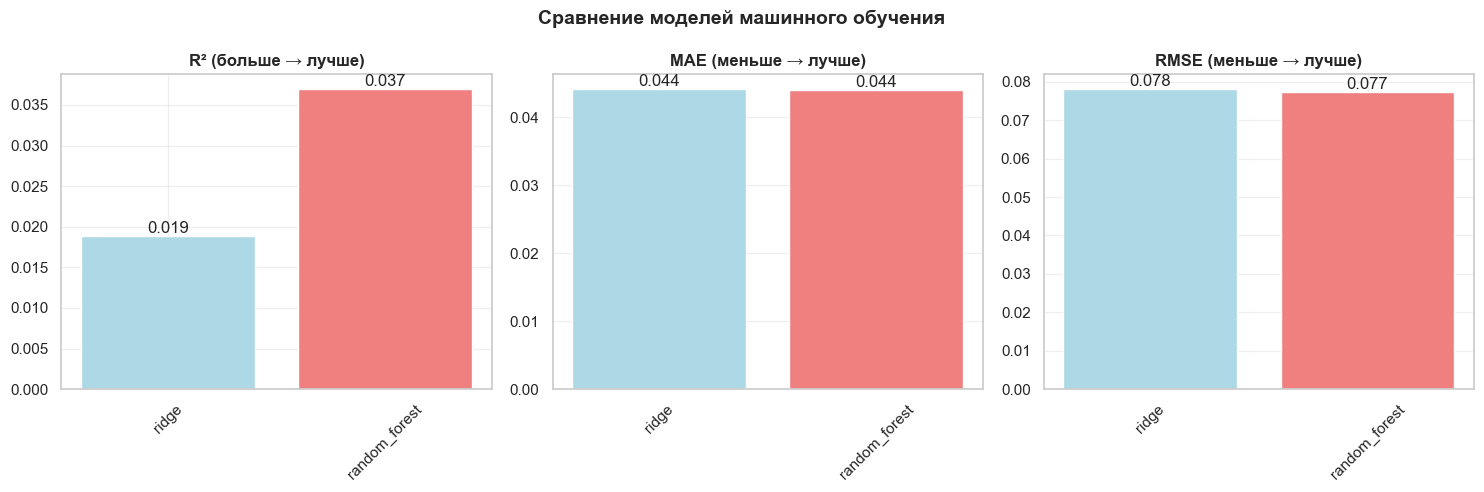

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0188 | MAE =  0.0441 | RMSE =  0.0780
   random_forest   | R² =  0.0369 | MAE =  0.0440 | RMSE =  0.0773

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0369)

🔬 Тестируем набор: A_geo_core
   Признаки: ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc']


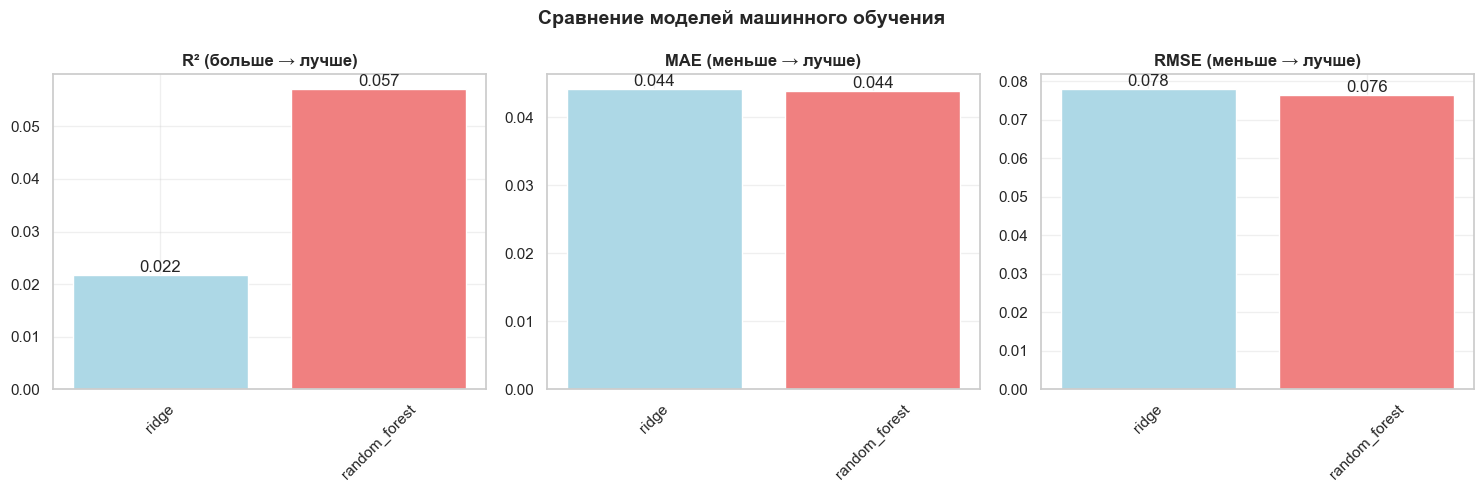

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0217 | MAE =  0.0441 | RMSE =  0.0779
   random_forest   | R² =  0.0571 | MAE =  0.0438 | RMSE =  0.0765

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0571)

🔬 Тестируем набор: B_h2s
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index']


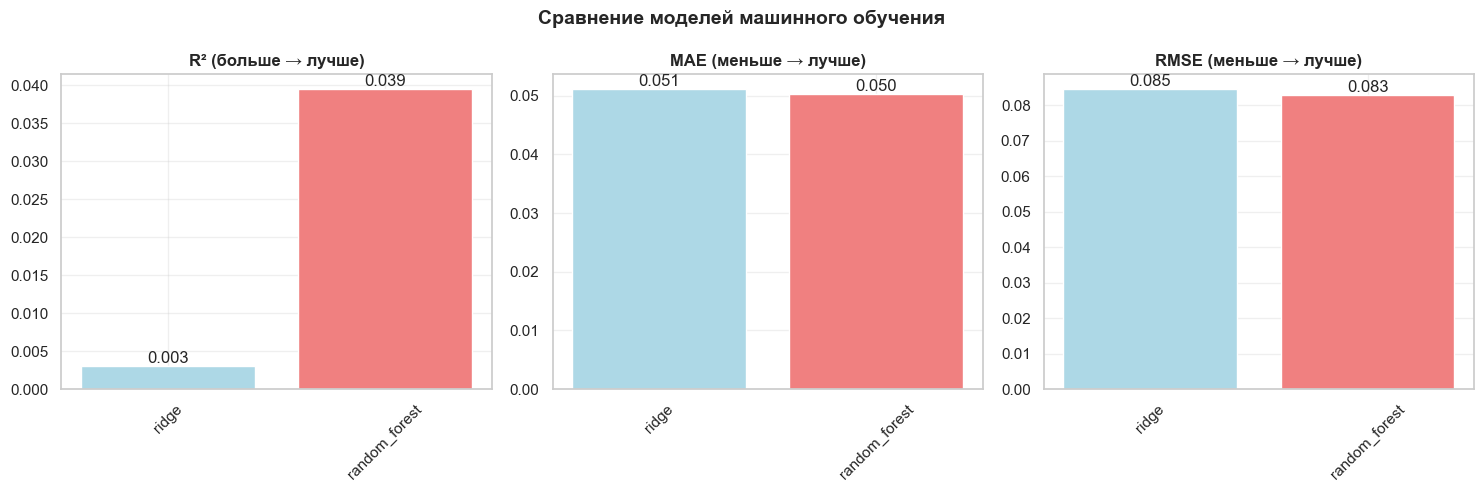

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0031 | MAE =  0.0511 | RMSE =  0.0845
   random_forest   | R² =  0.0395 | MAE =  0.0502 | RMSE =  0.0830

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0395)

🔬 Тестируем набор: C_indices
   Признаки: ['pitting_corrosion_index', 'underdeposit_corrosion_index', 'stress_corrosion_index', 'corrosion_aggressiveness_index']


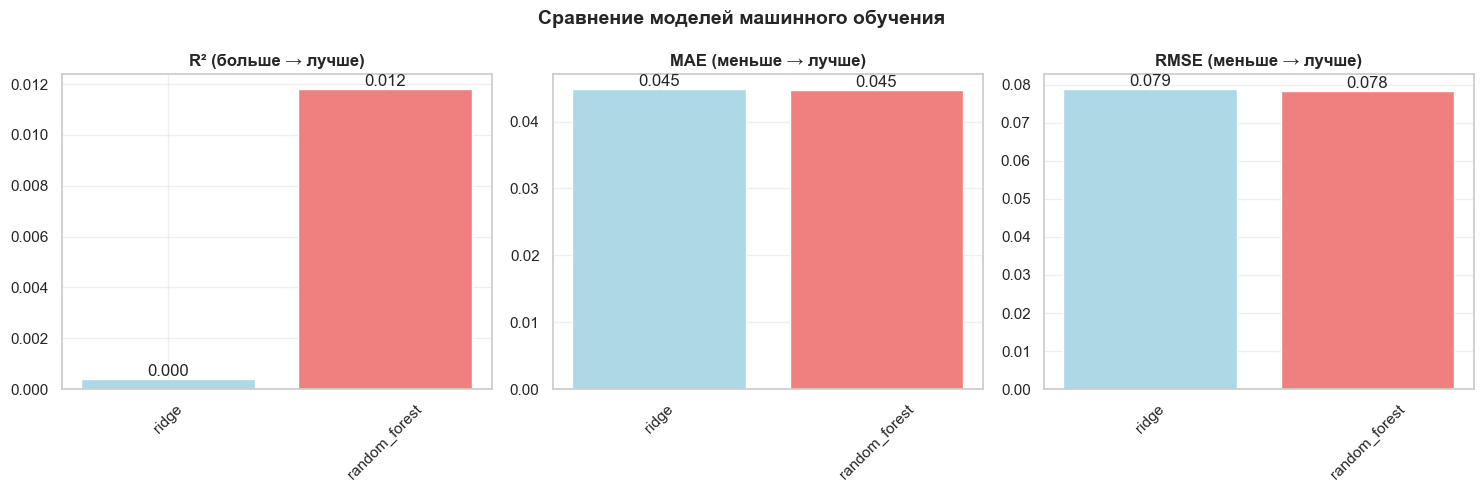

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0004 | MAE =  0.0448 | RMSE =  0.0788
   random_forest   | R² =  0.0118 | MAE =  0.0448 | RMSE =  0.0783

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0118)

🔬 Тестируем набор: D_ops
   Признаки: ['operating_temperature', 'operating_pressure', 'water_content']


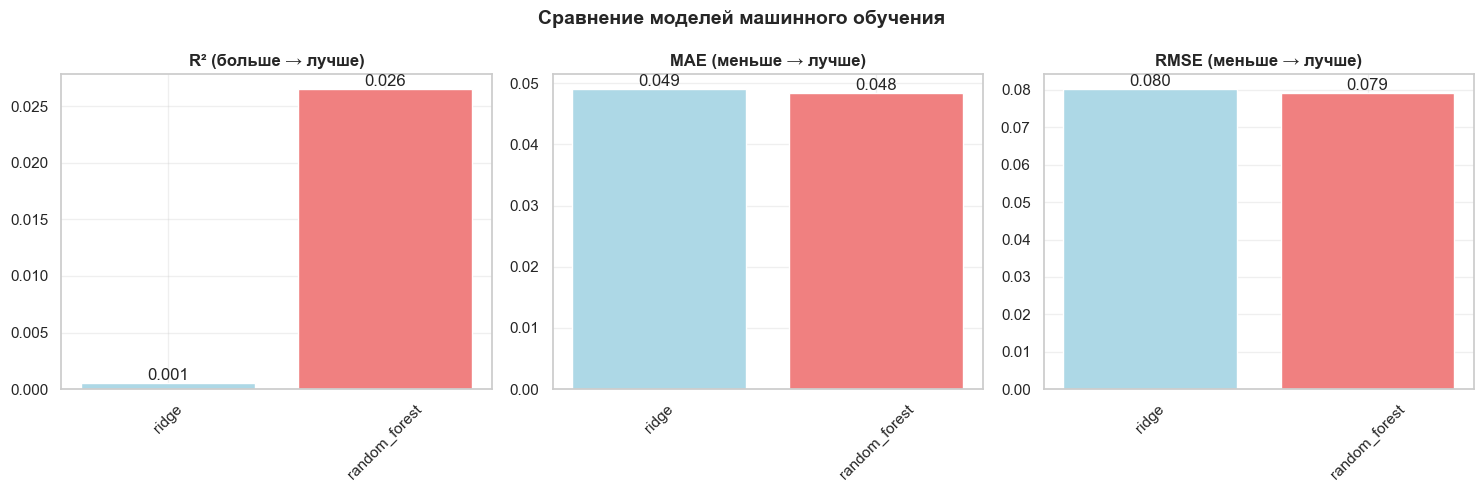

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0005 | MAE =  0.0490 | RMSE =  0.0801
   random_forest   | R² =  0.0265 | MAE =  0.0484 | RMSE =  0.0791

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0265)

🔬 Тестируем набор: E_material
   Признаки: ['material_resistance_score', 'equipment_age_years', 'component_type_id']


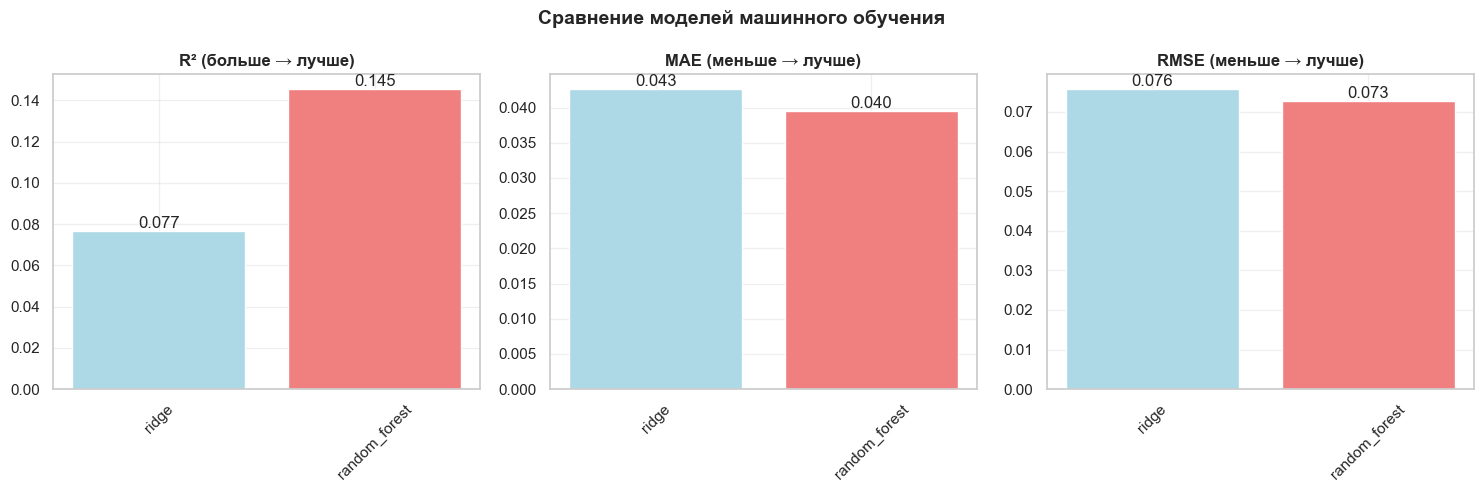

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0765 | MAE =  0.0426 | RMSE =  0.0757
   random_forest   | R² =  0.1454 | MAE =  0.0396 | RMSE =  0.0728

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.1454)

🔬 Тестируем набор: F_protection
   Признаки: ['corrosion_protection_index']


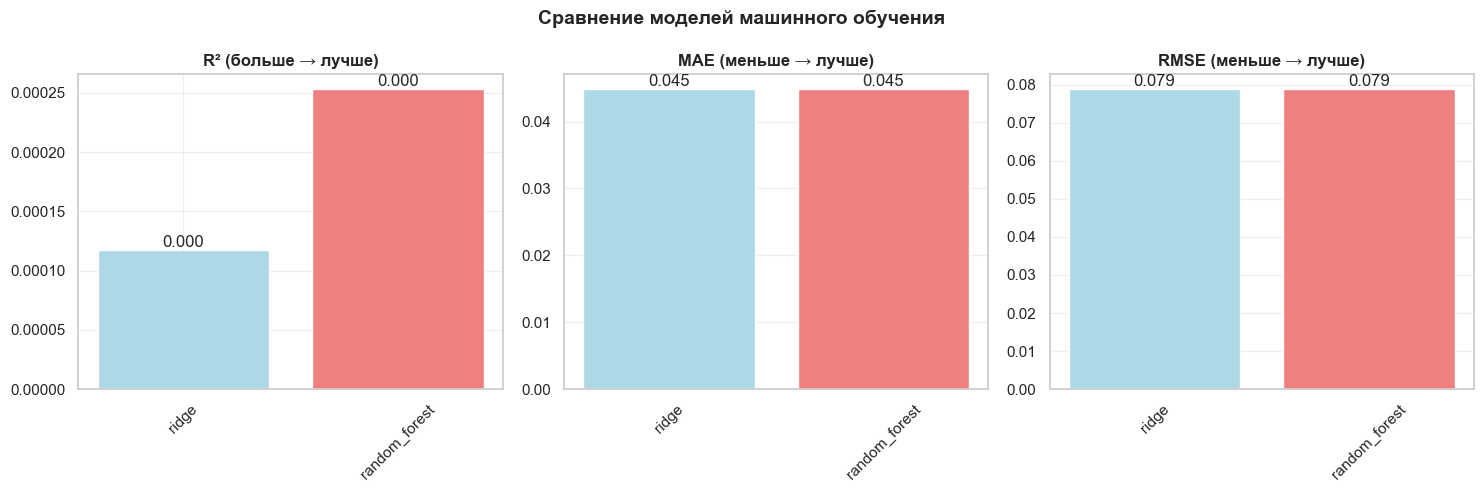

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0001 | MAE =  0.0448 | RMSE =  0.0788
   random_forest   | R² =  0.0003 | MAE =  0.0448 | RMSE =  0.0788

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0003)

🔬 Тестируем набор: G_geo+h2s
   Признаки: ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc', 'h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index']


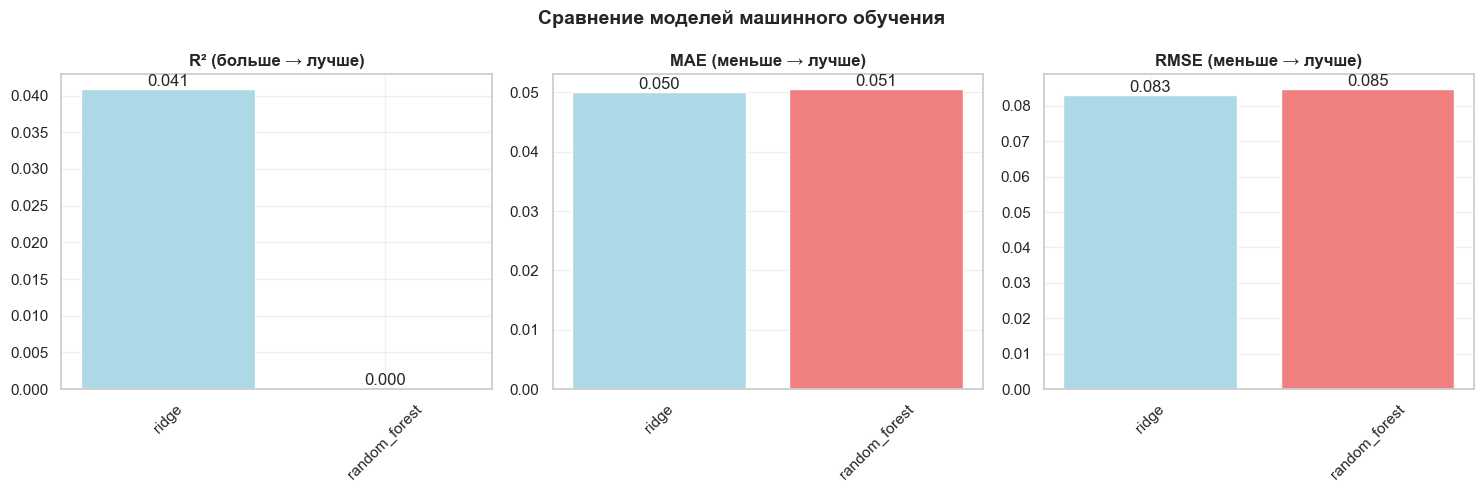

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0409 | MAE =  0.0501 | RMSE =  0.0829
   random_forest   | R² =  0.0002 | MAE =  0.0505 | RMSE =  0.0846

🎯 ЛУЧШАЯ МОДЕЛЬ: ridge (R² = 0.0409)

🔬 Тестируем набор: H_geo+indices
   Признаки: ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc', 'pitting_corrosion_index', 'underdeposit_corrosion_index', 'stress_corrosion_index', 'corrosion_aggressiveness_index']


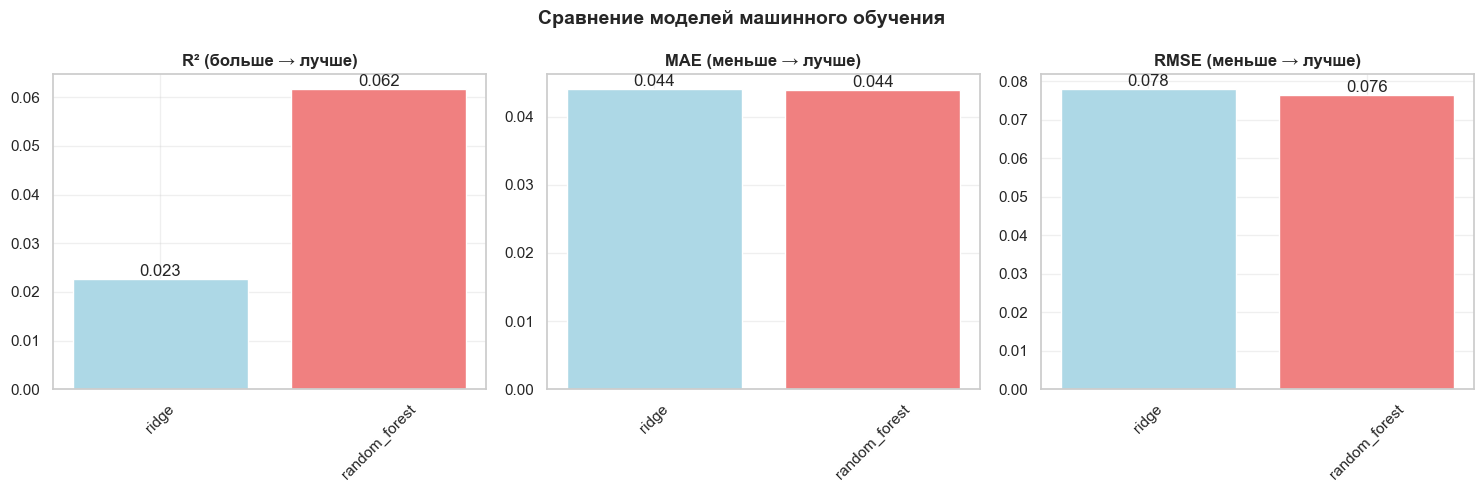

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0227 | MAE =  0.0440 | RMSE =  0.0779
   random_forest   | R² =  0.0616 | MAE =  0.0439 | RMSE =  0.0763

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0616)

🔬 Тестируем набор: I_h2s+indices
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'pitting_corrosion_index', 'underdeposit_corrosion_index', 'stress_corrosion_index', 'corrosion_aggressiveness_index']


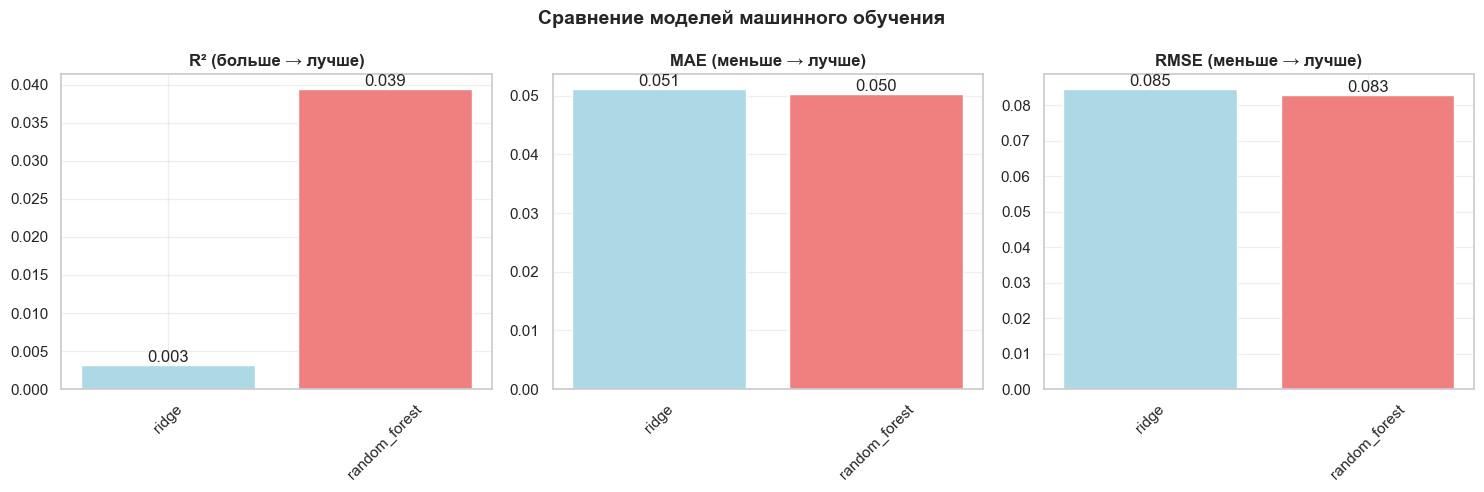

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0031 | MAE =  0.0511 | RMSE =  0.0845
   random_forest   | R² =  0.0394 | MAE =  0.0502 | RMSE =  0.0830

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.0394)

🔬 Тестируем набор: J_geo+h2s+indices
   Признаки: ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc', 'h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'pitting_corrosion_index', 'underdeposit_corrosion_index', 'stress_corrosion_index', 'corrosion_aggressiveness_index']


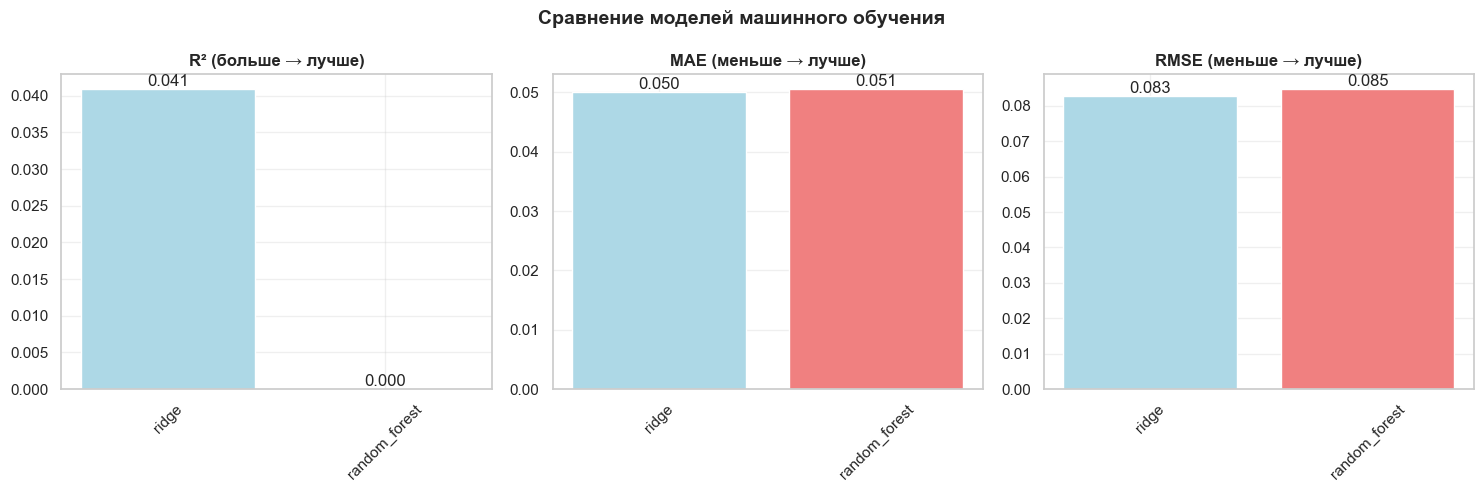

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0409 | MAE =  0.0501 | RMSE =  0.0829
   random_forest   | R² =  0.0001 | MAE =  0.0505 | RMSE =  0.0846

🎯 ЛУЧШАЯ МОДЕЛЬ: ridge (R² = 0.0409)

🔬 Тестируем набор: K_full_no_ops
   Признаки: ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc', 'h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'pitting_corrosion_index', 'underdeposit_corrosion_index', 'stress_corrosion_index', 'corrosion_aggressiveness_index', 'material_resistance_score', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index']


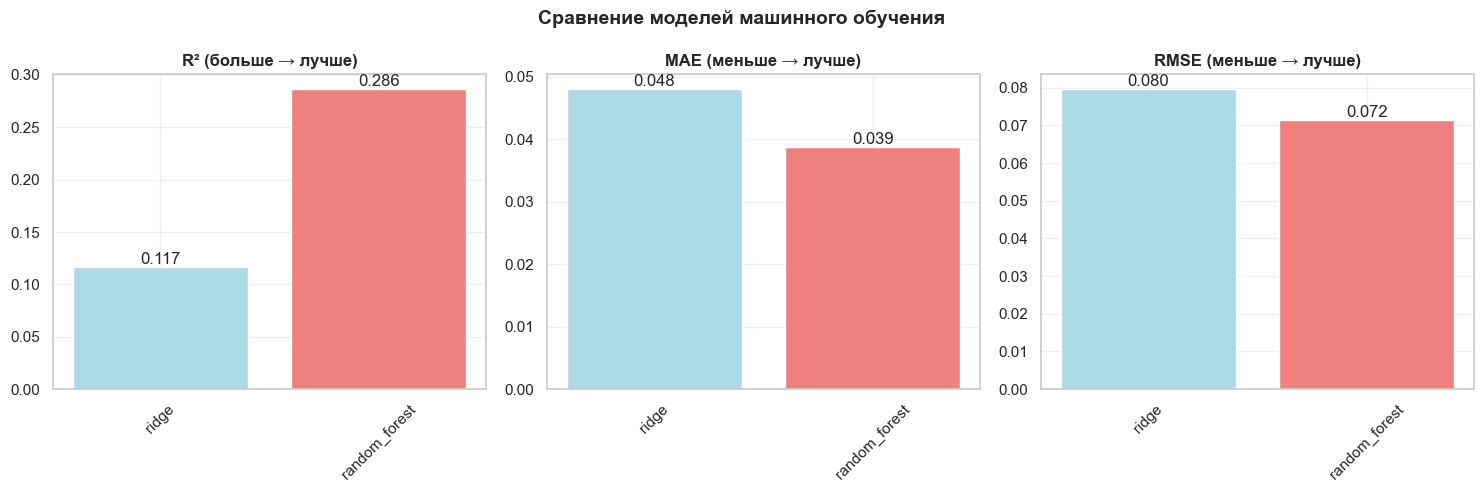

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1169 | MAE =  0.0480 | RMSE =  0.0795
   random_forest   | R² =  0.2863 | MAE =  0.0387 | RMSE =  0.0715

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2863)

🔬 Тестируем набор: L_full
   Признаки: ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc', 'h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'pitting_corrosion_index', 'underdeposit_corrosion_index', 'stress_corrosion_index', 'corrosion_aggressiveness_index', 'material_resistance_score', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index', 'operating_temperature', 'operating_pressure', 'water_content']


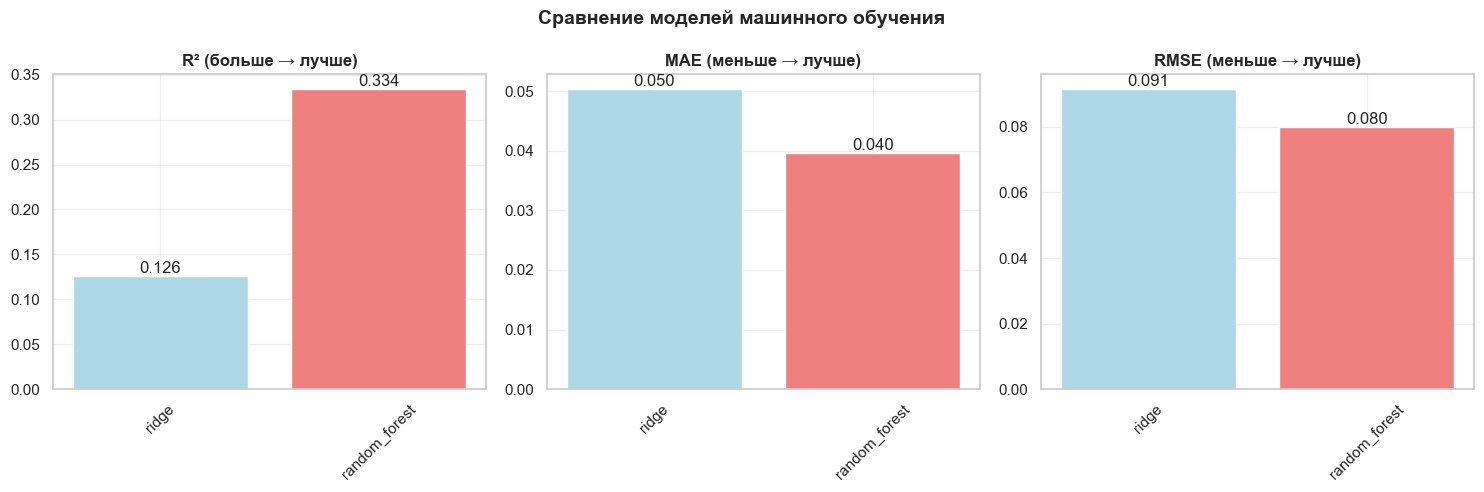

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1262 | MAE =  0.0503 | RMSE =  0.0915
   random_forest   | R² =  0.3338 | MAE =  0.0397 | RMSE =  0.0799

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.3338)

🔬 Тестируем набор: M_no_geo
   Признаки: ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'pitting_corrosion_index', 'underdeposit_corrosion_index', 'stress_corrosion_index', 'corrosion_aggressiveness_index', 'material_resistance_score', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index', 'operating_temperature', 'operating_pressure', 'water_content']


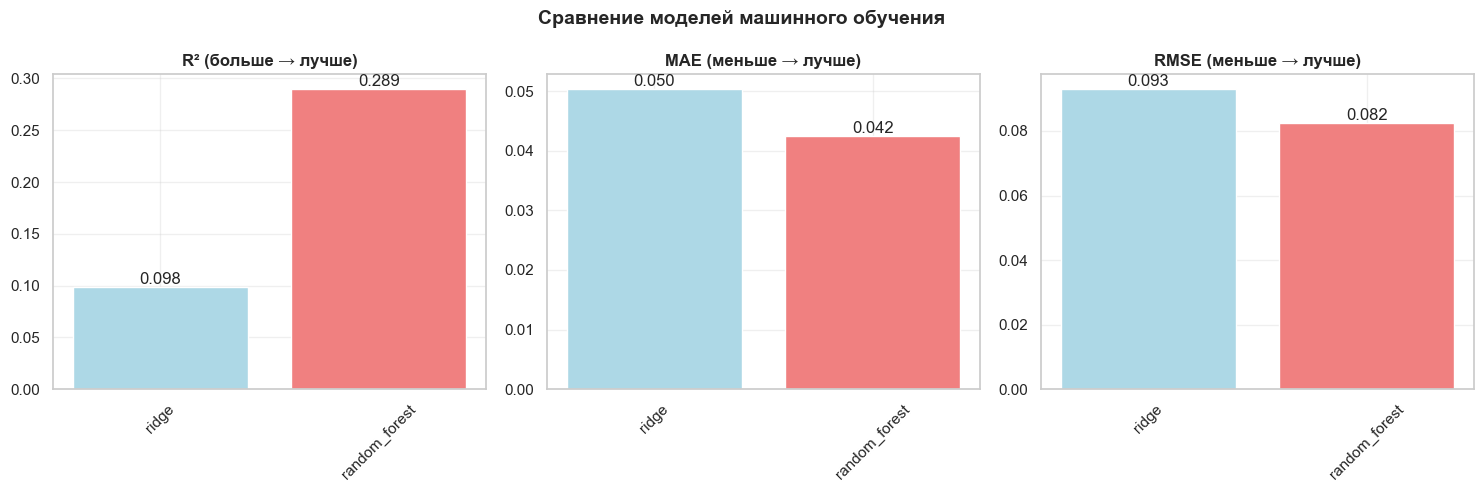

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0984 | MAE =  0.0503 | RMSE =  0.0929
   random_forest   | R² =  0.2895 | MAE =  0.0424 | RMSE =  0.0825

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2895)

🔬 Тестируем набор: N_no_h2s
   Признаки: ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc', 'pitting_corrosion_index', 'underdeposit_corrosion_index', 'stress_corrosion_index', 'corrosion_aggressiveness_index', 'material_resistance_score', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index', 'operating_temperature', 'operating_pressure', 'water_content']


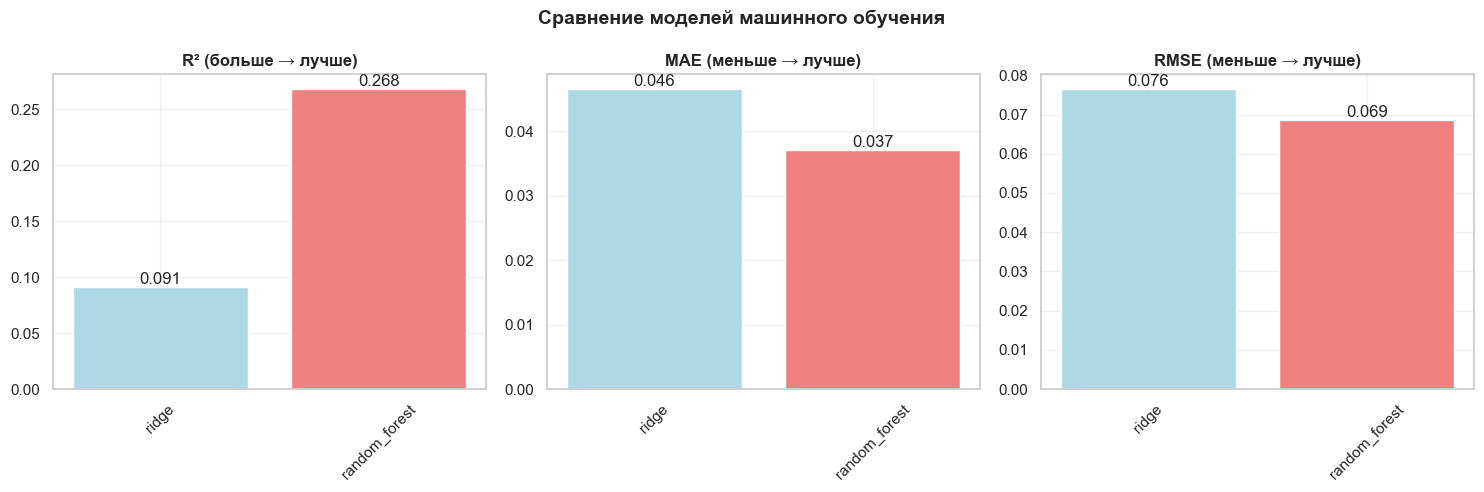

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.0912 | MAE =  0.0465 | RMSE =  0.0764
   random_forest   | R² =  0.2678 | MAE =  0.0371 | RMSE =  0.0686

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.2678)

🔬 Тестируем набор: O_no_indices
   Признаки: ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc', 'h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'material_resistance_score', 'equipment_age_years', 'component_type_id', 'corrosion_protection_index', 'operating_temperature', 'operating_pressure', 'water_content']


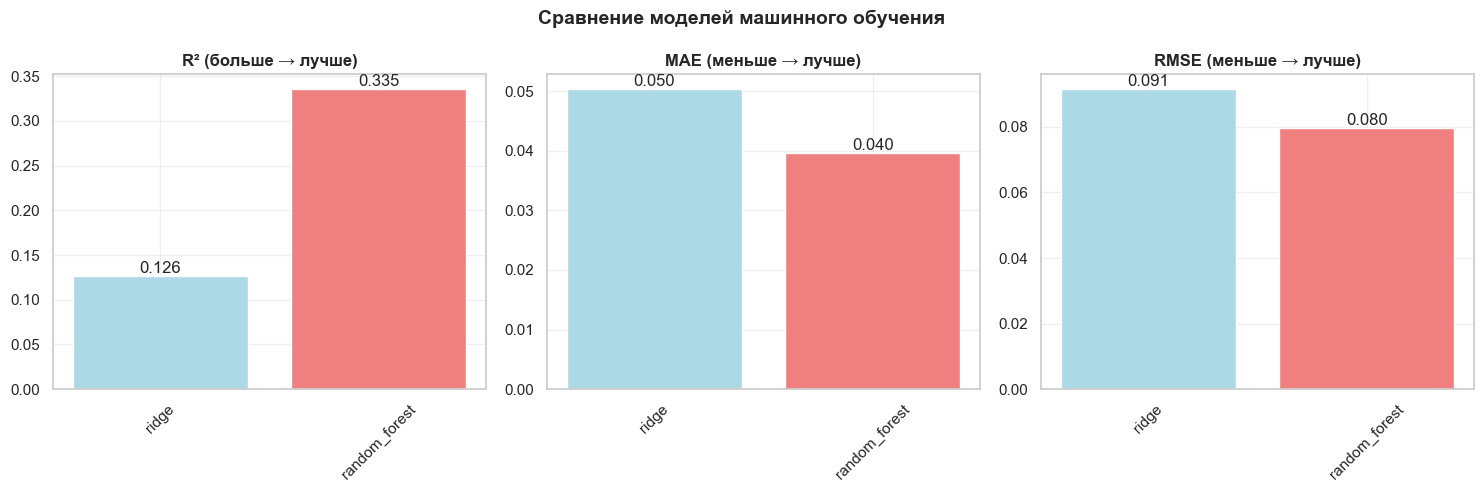

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1262 | MAE =  0.0503 | RMSE =  0.0915
   random_forest   | R² =  0.3353 | MAE =  0.0397 | RMSE =  0.0798

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.3353)

🔬 Тестируем набор: P_no_protection
   Признаки: ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio', 'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc', 'h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index', 'pitting_corrosion_index', 'underdeposit_corrosion_index', 'stress_corrosion_index', 'corrosion_aggressiveness_index', 'material_resistance_score', 'equipment_age_years', 'component_type_id', 'operating_temperature', 'operating_pressure', 'water_content']


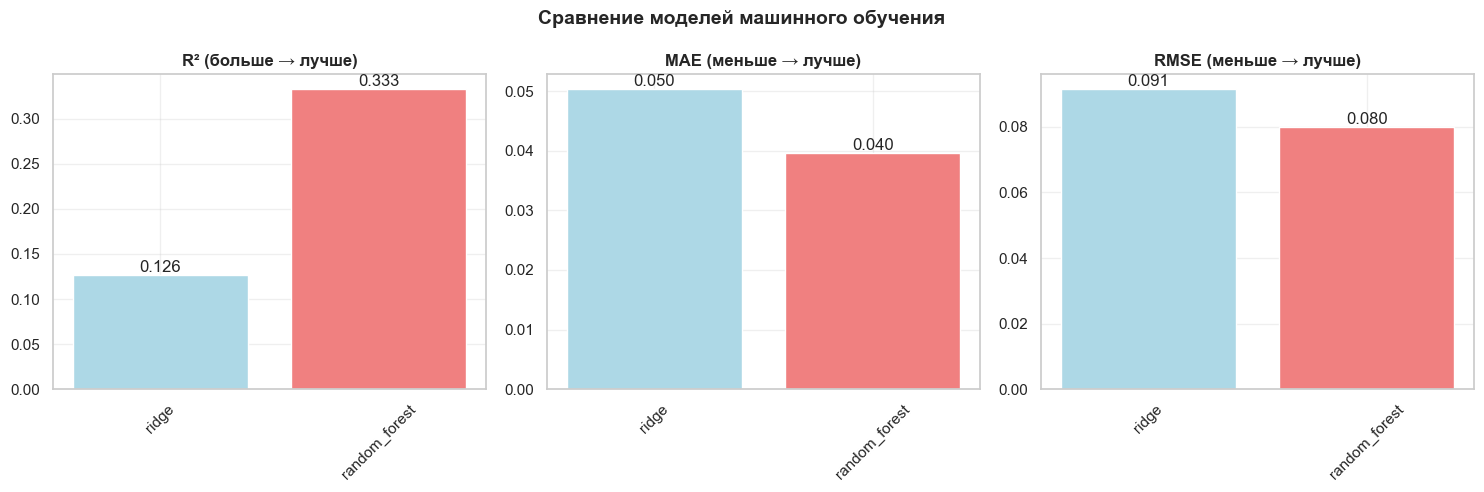

📊 РЕЗУЛЬТАТЫ МОДЕЛЕЙ
   ridge           | R² =  0.1262 | MAE =  0.0503 | RMSE =  0.0915
   random_forest   | R² =  0.3327 | MAE =  0.0397 | RMSE =  0.0799

🎯 ЛУЧШАЯ МОДЕЛЬ: random_forest (R² = 0.3327)

📋 Сводная таблица по наборам признаков (Random Forest):
                   R2 Random Forest  MAE Random Forest
Набор параметров                                      
A_geo_min                    0.0369             0.0440
A_geo_core                   0.0571             0.0438
B_h2s                        0.0395             0.0502
C_indices                    0.0118             0.0448
D_ops                        0.0265             0.0484
E_material                   0.1454             0.0396
F_protection                 0.0003             0.0448
G_geo+h2s                    0.0002             0.0505
H_geo+indices                0.0616             0.0439
I_h2s+indices                0.0394             0.0502
J_geo+h2s+indices            0.0001             0.0505
K_full_no_ops              

<Figure size 1200x600 with 0 Axes>

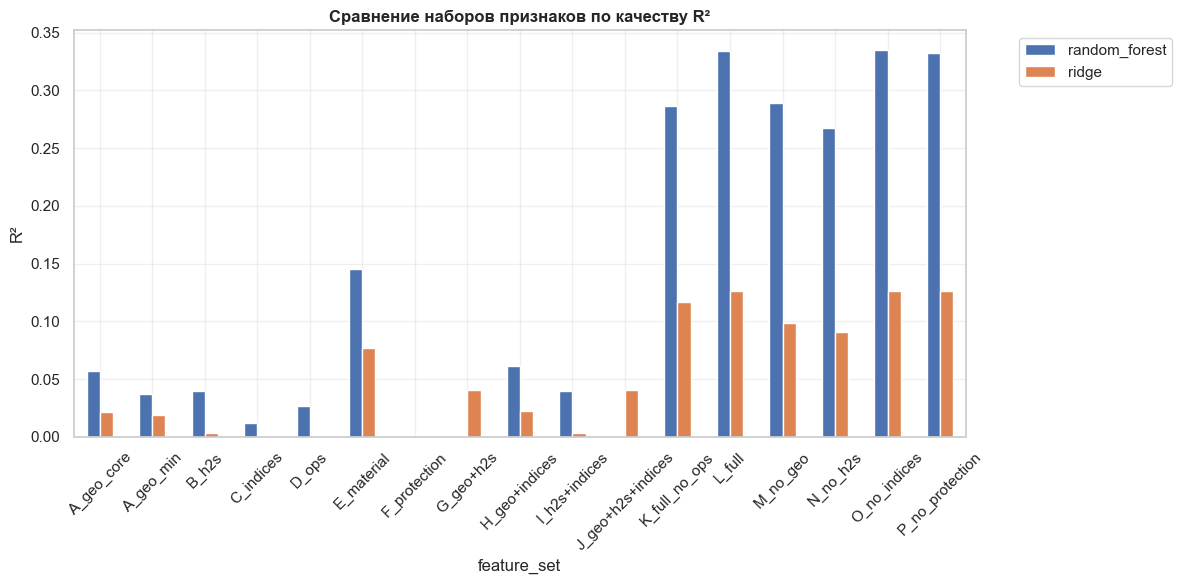

In [7]:
feature_sets = {
    # Базовые блоки (изолировано)
    'A_geo_min': ['wall_thickness'],
    'A_geo_core': ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio',
                   'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc'],
    'B_h2s': ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index'],
    'C_indices': ['pitting_corrosion_index', 'underdeposit_corrosion_index',
                  'stress_corrosion_index', 'corrosion_aggressiveness_index'],
    'D_ops': ['operating_temperature', 'operating_pressure', 'water_content'],
    'E_material': ['material_resistance_score', 'equipment_age_years', 'component_type_id'],
    'F_protection': ['corrosion_protection_index'],

    # Пары блоков
    'G_geo+h2s': ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio',
                  'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc',
                  'h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index'],
    'H_geo+indices': ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio',
                      'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc',
                      'pitting_corrosion_index', 'underdeposit_corrosion_index',
                      'stress_corrosion_index', 'corrosion_aggressiveness_index'],
    'I_h2s+indices': ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index',
                      'pitting_corrosion_index', 'underdeposit_corrosion_index',
                      'stress_corrosion_index', 'corrosion_aggressiveness_index'],

    # Крупные комбинации
    'J_geo+h2s+indices': ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio',
                          'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc',
                          'h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index',
                          'pitting_corrosion_index', 'underdeposit_corrosion_index',
                          'stress_corrosion_index', 'corrosion_aggressiveness_index'],
    'K_full_no_ops': ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio',
                      'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc',
                      'h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index',
                      'pitting_corrosion_index', 'underdeposit_corrosion_index',
                      'stress_corrosion_index', 'corrosion_aggressiveness_index',
                      'material_resistance_score', 'equipment_age_years', 'component_type_id',
                      'corrosion_protection_index'],
    'L_full': ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio',
               'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc',
               'h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index',
               'pitting_corrosion_index', 'underdeposit_corrosion_index',
               'stress_corrosion_index', 'corrosion_aggressiveness_index',
               'material_resistance_score', 'equipment_age_years', 'component_type_id',
               'corrosion_protection_index', 'operating_temperature', 'operating_pressure', 'water_content'],

    # Абляции от полного набора (чувствительность к блокам)
    'M_no_geo': ['h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index',
                 'pitting_corrosion_index', 'underdeposit_corrosion_index',
                 'stress_corrosion_index', 'corrosion_aggressiveness_index',
                 'material_resistance_score', 'equipment_age_years', 'component_type_id',
                 'corrosion_protection_index', 'operating_temperature', 'operating_pressure', 'water_content'],
    'N_no_h2s': ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio',
                 'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc',
                 'pitting_corrosion_index', 'underdeposit_corrosion_index',
                 'stress_corrosion_index', 'corrosion_aggressiveness_index',
                 'material_resistance_score', 'equipment_age_years', 'component_type_id',
                 'corrosion_protection_index', 'operating_temperature', 'operating_pressure', 'water_content'],
    'O_no_indices': ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio',
                     'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc',
                     'h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index',
                     'material_resistance_score', 'equipment_age_years', 'component_type_id',
                     'corrosion_protection_index', 'operating_temperature', 'operating_pressure', 'water_content'],
    'P_no_protection': ['wall_thickness', 'cross_sectional_area', 'diameter_to_thickness_ratio',
                        'inner_diameter', 'outer_diameter', 'nominal_thickness_mmc',
                        'h2s_content', 'h2s_water_ratio', 'h2s_aggressiveness_index',
                        'pitting_corrosion_index', 'underdeposit_corrosion_index',
                        'stress_corrosion_index', 'corrosion_aggressiveness_index',
                        'material_resistance_score', 'equipment_age_years', 'component_type_id',
                        'operating_temperature', 'operating_pressure', 'water_content'],
}

comparison = analyzer.compare_feature_sets(feature_sets)